In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Honors Program/honors/honors_data

/content/drive/.shortcut-targets-by-id/15JtMaqUj0g0u5Rfig5mYfKaeRPqMjZ6o/honors/honors_data


In [ ]:
%%capture
!pip install bertopic

In [ ]:
from bertopic import BERTopic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('completed_data.xlsx')
content = data['博文内容']

In [ ]:
timestamps = data['时间'].to_list()
texts = content.to_list()

## 生成主题

In [ ]:
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(texts)

In [ ]:
# topic_model = BERTopic.load("/content/drive/MyDrive/Honors Program/honors/BERTopic/1.15/model")

In [ ]:
topics_to_merge = [-1, 0]
topic_model.merge_topics(texts, topics_to_merge)

In [ ]:
topic_labels = {
    -1: "General Market",
    0: "Medical Care",
    1: "Artificial Intelligence",
    2: "Technology",
    3: "Revenues",
    4: "Stock Indexes",
    5: "Speculators",
    6: "Past Performance",
    7: "Growth Stock",
    8: "Future Performance",
    9: "Renewable Energy"
}

topic_model.set_topic_labels(topic_labels)

In [ ]:
freq = topic_model.get_topic_info()
freq.head(11)

,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,-1,117630,-1_市场_指数_上涨_大盘,General Market,"[市场, 指数, 上涨, 大盘, 反弹, 行情, 下跌, 个股, 板块, a股]","[['点评', '市场', '十大', '人气', '龙头', '人工智能', '鸿博', ..."
1,0,2071,0_医疗_医药_药业_生物,Medical Care,"[医疗, 医药, 药业, 生物, 制药, 中药, 医院, 反腐, 医疗器械, 生物医药]","[['涨停', '复盘', '医药', '生物', '四板', '塞力', '医疗', '医..."
2,1,1568,1_ai_人工智能_模型_算力,Artificial Intelligence,"[ai, 人工智能, 模型, 算力, 昆仑, 万维, 伟达, 剑桥, 核心, cpo]","[['人工智能', '资金', '流入', '最多', '家', '龙头', '标的', '..."
3,2,1439,2_直真_科技_科技股_技术,Technology,"[直真, 科技, 科技股, 技术, sz, 差价, 放着, 掌阅, 恒久, 掌趣]","[['昇', '辉', '科技', 'sz', '低', '关注'], ['直真', '科技..."
4,3,1085,3_净利润_同比_营业_收入,Revenues,"[净利润, 同比, 营业, 收入, 增长, 归属于, 每股, 上半年, 归母, 亿元]","[['上海', '谊', '众', '披露', '半年报', '上半年', '公司', '营..."
5,4,945,4_股票指数_股票市场_股票行情_券商,Stock Indexs,"[股票指数, 股票市场, 股票行情, 券商, 股票证券, 索赔, 年月日, 钟摆, 条件, 指标]","[['股票指数', '想', 'V', '转', '成功'], ['股票指数', '向上',..."
6,5,676,5_炒家_北京_刘畊宏_干货,Speculators,"[炒家, 北京, 刘畊宏, 干货, 总部, 京东, 看法, 避雷, 国兴, 家园]","[['北京', '炒家', '市场', '方向', '干货', '北京', '炒家'], [..."
7,6,613,6_昨天_保定_贴单_提示,Past Performance,"[昨天, 保定, 贴单, 提示, 验证, 昨天下午, 发了, 幸亏, 一棵, 辉煌]","[['昨天', '买', '卖'], ['昨天', '补'], ['昨天', 't']]"
8,7,540,7_名单_龙头股_一览_中国,Growth Stock,"[名单, 龙头股, 一览, 中国, 这家, 潜力, 十倍, 股市, 翻倍, 潜力股]","[['中国', '股市', '未来', '年', '有望', '翻倍', '氢', '能源'..."
9,8,510,8_明天_明日_开业_无股,Future Performance,"[明天, 明日, 开业, 无股, 几股, 厂子, 好了吗, 下班, 看跌, 开市]","[['明天', '亏'], ['明天', '埋'], ['明天', '新']]"


In [ ]:
topics_over_time = topic_model.topics_over_time(docs=texts,
                                                timestamps=timestamps,
                                                global_tuning=True,
                                                evolution_tuning=True,
                                                nr_bins=20)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics = [-1,0,1,2,3,4,5,6,7,8,9], normalize_frequency=True, custom_labels=True)

In [ ]:
topic_model.save("model", serialization="pickle")

2024-01-15 09:06:37,090 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



## 下载主题分类

In [ ]:
data['主题标签'] = topics

In [ ]:
data = data.drop(["转发数", "评论数", "点赞数"], axis=1)

In [ ]:
data.shape

(191460, 3)

In [ ]:
data.to_excel('completed_data_with_topics.xlsx', index=False)

## 主题相对频次

In [ ]:
cd /content/drive/MyDrive/Honors Program/honors/BERTopic

/content/drive/.shortcut-targets-by-id/15JtMaqUj0g0u5Rfig5mYfKaeRPqMjZ6o/honors/BERTopic


In [ ]:
data = pd.read_excel('completed_data_with_topics.xlsx')

In [ ]:
data.head()

In [ ]:
# 筛选主题标签在0到9之间的数据
selected_topics = list(range(0, 10))
selected_data = data[data['主题标签'].isin(selected_topics)]

### 每月

<ipython-input-9-fe28f445b50b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['年份'] = selected_data['时间'].dt.year
<ipython-input-9-fe28f445b50b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['月份'] = selected_data['时间'].dt.month


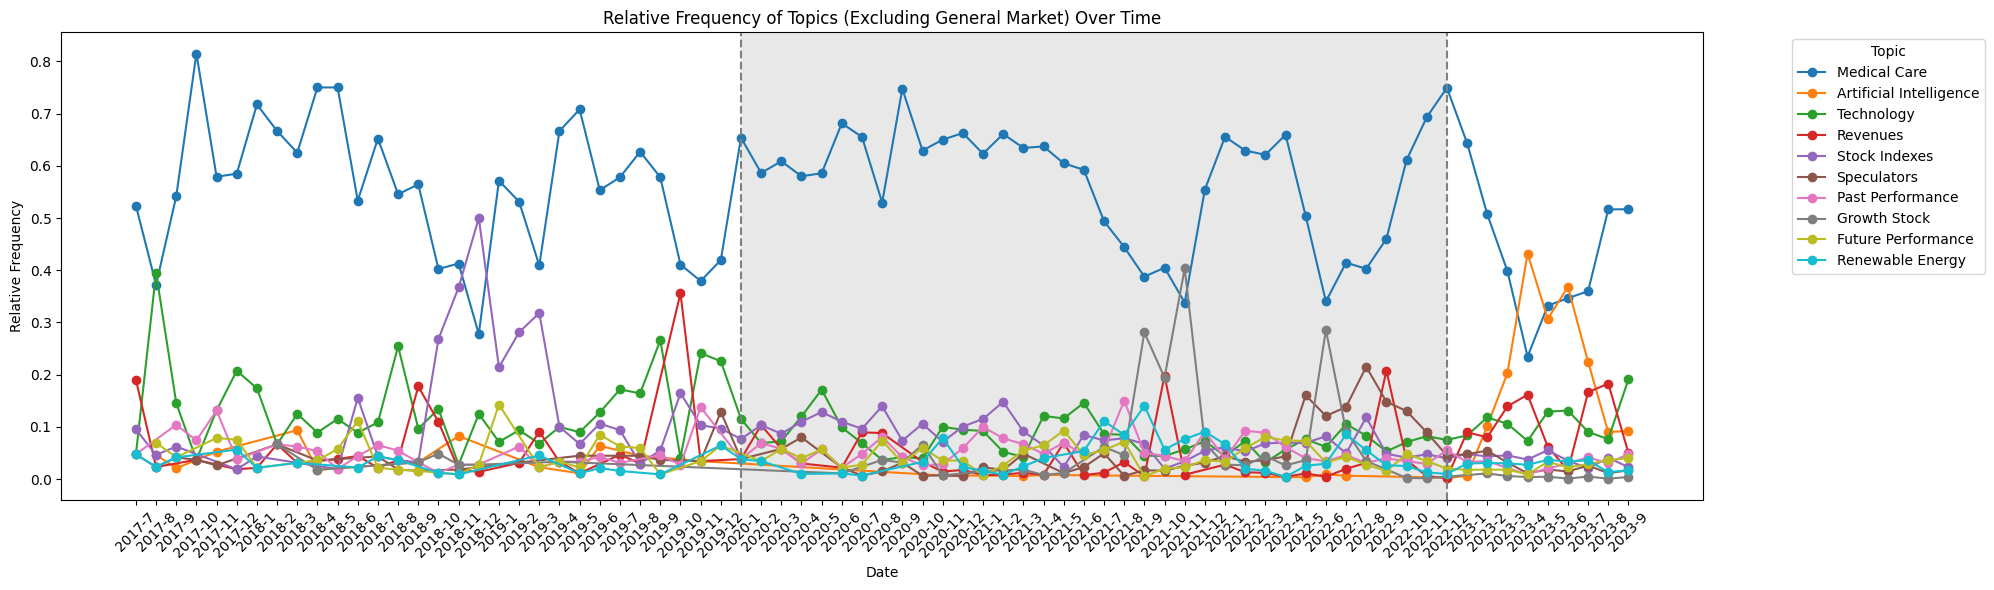

In [ ]:
# 提取年份和月份作为新的列
selected_data['年份'] = selected_data['时间'].dt.year
selected_data['月份'] = selected_data['时间'].dt.month

# 计算每月主题标签为0到9的帖子在当月所有帖子中的比例
monthly_topic_counts = selected_data.groupby(['年份', '月份', '主题标签']).size().reset_index(name='主题帖子数')
monthly_total_counts = selected_data.groupby(['年份', '月份']).size().reset_index(name='总帖子数')
monthly_topic_ratios = monthly_topic_counts.merge(monthly_total_counts, on=['年份', '月份'])
monthly_topic_ratios['比例'] = monthly_topic_ratios['主题帖子数'] / monthly_topic_ratios['总帖子数']

# 主题标签
labels = {
    -1: "General Market",
    0: "Medical Care",
    1: "Artificial Intelligence",
    2: "Technology",
    3: "Revenues",
    4: "Stock Indexes",
    5: "Speculators",
    6: "Past Performance",
    7: "Growth Stock",
    8: "Future Performance",
    9: "Renewable Energy"
}

# 绘图
hot_topics = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.figure(figsize=(20, 6))
for topic in hot_topics:
    topic_data = monthly_topic_ratios[monthly_topic_ratios['主题标签'] == topic]
    topic_name = labels[topic]
    plt.plot(topic_data['年份'].astype(str) + '-' + topic_data['月份'].astype(str), topic_data['比例'], marker='o', linestyle='-', label=topic_name)

plt.title('Relative Frequency of Topics (Excluding General Market) Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Frequency')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.axvline(x='2020-1', color='grey', linestyle='--', label='2020-1')
plt.axvline(x='2022-12', color='grey', linestyle='--', label='2022-12')

plt.axvspan('2020-1', '2022-12', facecolor='lightgray', alpha=0.5)

plt.show()

In [ ]:
monthly_topic_ratios.to_excel('monthly_topic_ratios.xlsx', index=False)

In [ ]:
# monthly_topic_ratios = pd.read_excel('monthly_topic_ratios.xlsx')

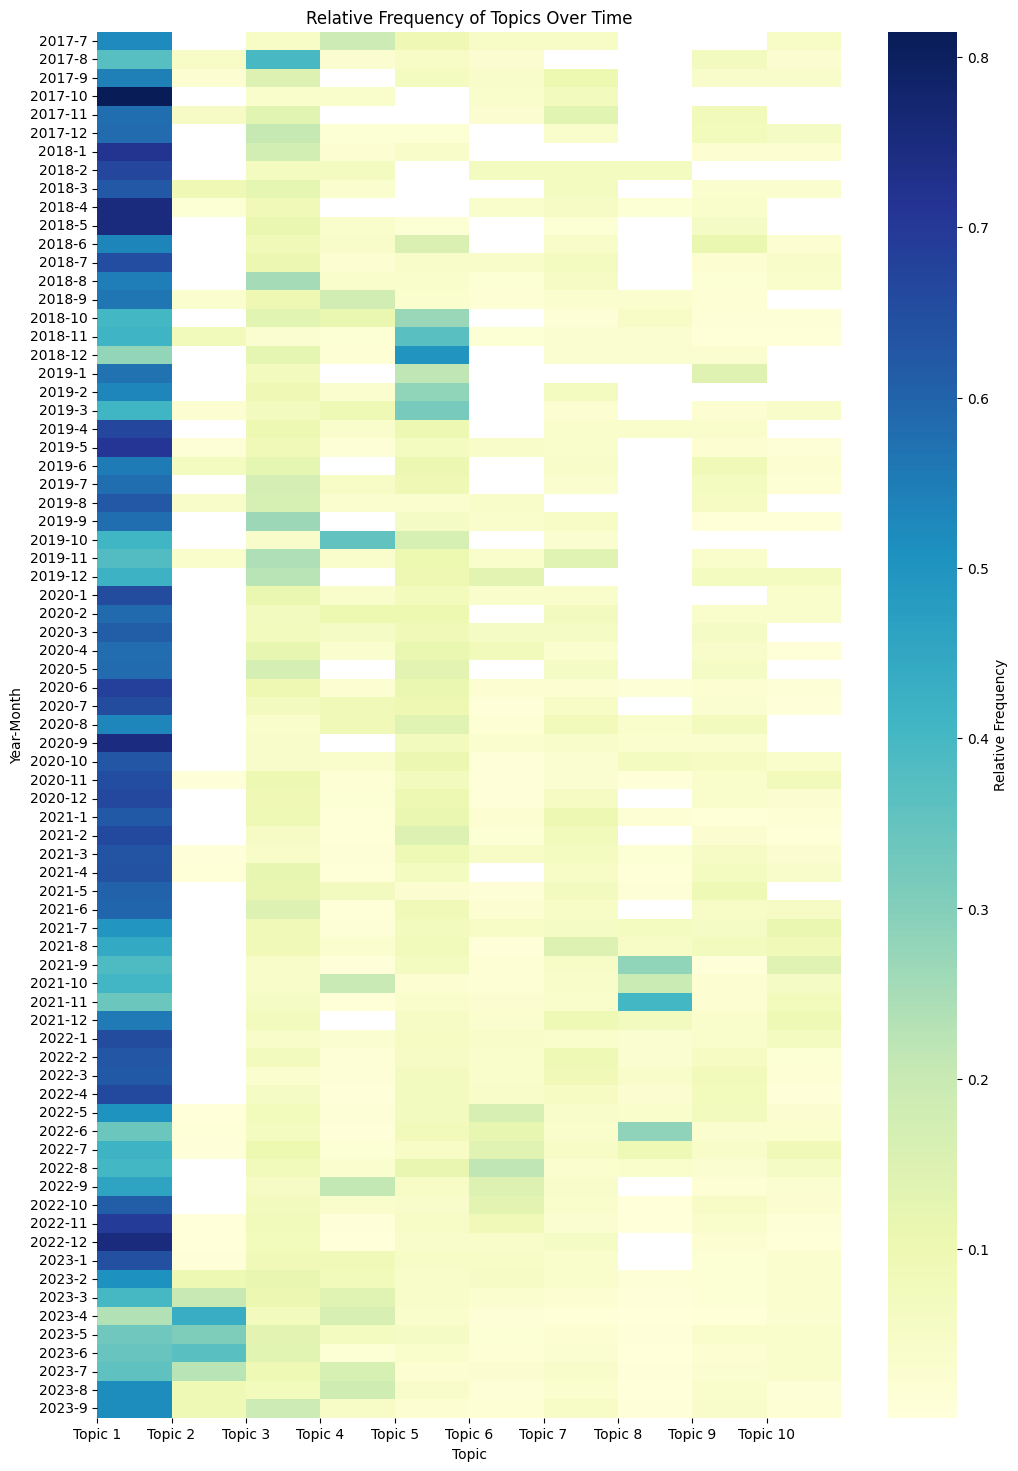

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个透视表，以年份和月份为索引，主题标签为列，并计算每个组合的平均比例
heatmap_data = monthly_topic_ratios.pivot_table(index=['年份', '月份'], columns='主题标签', values='比例', aggfunc='mean')

# 绘制热力图
plt.figure(figsize=(12, 18))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Relative Frequency'})
plt.title('Relative Frequency of Topics Over Time')
plt.xlabel('Topic')
plt.ylabel('Year-Month')
plt.xticks(ticks=range(10), labels=[f'Topic {i+1}' for i in range(10)])
plt.show()

### 每月Top 2

In [ ]:
# 按照年份和月份分组，并找出每组中比例最高的前两个主题
top_topics = (
    monthly_topic_ratios
    .groupby(['年份', '月份'])
    .apply(lambda x: x.nlargest(2, '比例'))
    .reset_index(drop=True)
)

# 将labels转换为DataFrame
labels_df = pd.DataFrame(list(labels.items()), columns=['主题标签', '主题'])

# 将top_topics与labels合并
top_topics_with_labels = top_topics.merge(labels_df, on='主题标签', how='left')

In [ ]:
top_topics_with_labels.to_excel('top_topics_over_time.xlsx', index=False)

### 3 Stages

In [ ]:
# 划分阶段
stages = {
    'Pre-COVID': (2017, 2019),
    'During-COVID': (2020, 2022),
    'Post-COVID': (2023, 2023)
}

st = []
label = []
ratio = []

# 计算每个阶段的主题相对频次平均值
for stage, (start_date, end_date) in stages.items():
    stage_data = monthly_topic_ratios[(monthly_topic_ratios['年份'] >= start_date) & (monthly_topic_ratios['年份'] <= end_date)]
    stage_mean_topic_ratios = stage_data.groupby('主题标签')['比例'].mean().reset_index()
    for i in range(0,10):
        st.append(stage)
        label.append(stage_mean_topic_ratios['主题标签'][i])
        ratio.append(stage_mean_topic_ratios['比例'][i])

stage_topic_ratios = pd.DataFrame({'阶段': st, '主题标签': label, '比例': ratio})

In [ ]:
stage_topic_ratios

,阶段,主题标签,比例
0,Pre-COVID,0,0.558197
1,Pre-COVID,1,0.043622
2,Pre-COVID,2,0.134403
3,Pre-COVID,3,0.064514
4,Pre-COVID,4,0.132781
5,Pre-COVID,5,0.041522
6,Pre-COVID,6,0.051935
7,Pre-COVID,7,0.036314
8,Pre-COVID,8,0.046617
9,Pre-COVID,9,0.030168


In [ ]:
# 使用 pivot_table 转换数据
pivot_table = stage_topic_ratios.pivot_table(index='主题标签', columns='阶段', values='比例', fill_value=0)

# 计算每个阶段的平均值
mean_values = pivot_table.mean(axis=1).to_frame(name='Average')
pivot_table = pd.concat([pivot_table, mean_values], axis=1)

# 添加 Label 列
labels_df = pd.DataFrame({'Topic': pivot_table.index, 'Label': [labels[label] for label in pivot_table.index]})
pivot_table = pd.concat([labels_df, pivot_table], axis=1)

pivot_table = pivot_table.round(2)

# 重新排列列的顺序
pivot_table = pivot_table[[ 'Topic', 'Label', 'Pre-COVID', 'During-COVID', 'Post-COVID', 'Average']]

In [ ]:
pivot_table

,Topic,Label,Pre-COVID,During-COVID,Post-COVID,Average
0,0,Medical Care,0.56,0.57,0.43,0.52
1,1,Artificial Intelligence,0.04,0.01,0.20,0.08
2,2,Technology,0.13,0.08,0.11,0.11
3,3,Revenues,0.06,0.04,0.11,0.07
4,4,Stock Indexs,0.13,0.08,0.04,0.08
5,5,Speculators,0.04,0.05,0.03,0.04
6,6,Past Performance,0.05,0.06,0.03,0.05
7,7,Growth Stock,0.04,0.07,0.00,0.04
8,8,Future Performance,0.05,0.04,0.02,0.04
9,9,Renewable Energy,0.03,0.04,0.03,0.03


In [ ]:
pivot_table.to_excel('stage_topic_ratios.xlsx', index=False)